#### Import Dependencies

In [1]:
import random
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

#### Save config information.

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "febde43dfe4affe5e81fe677f8e0a7e3"

#### Generate 500 cities for data analysis

In [11]:
# Latitude limits for the analysis are the full -90 degrees and 90 degrees.
# Longitude limits are -180 degrees and 180 degrees.
lat_min = -90
lat_max = 90

long_min = -180
long_max = 180

# Set a counter and create an empty list for holding the city and country
# information
counter = 0
cities = []
countries = []

#Generate pseudo-random latitude and longitude coordinates
while counter < 560:
    lat = random.uniform(lat_min, lat_max)
    long = random.uniform(long_min, long_max)

#Pick the nearest city to those latitude and longitude values
    loc = citipy.nearest_city(lat, long)
    city = loc.city_name
    country = loc.country_code
    if city: 
        if city not in cities:
            cities.append(city)
            countries.append(country)
            counter = counter + 1
        else:
            pass

#### Perform a query to OpenWeatherMap site for each city

In [12]:
#What I want is to run a loop for 500 individual cities, where for each
#city I pull the weather data and then move on to the next city. Unfortunately
#the Citipy database is more extensive than OpenWeatherMap, so I end up with 
#fewer than 500 cities in my weather data if I simply perform 500 queries. To
#to offset and reconcile this, I selected more than 500 cities from the CitiPy
#app and then performed queries on each of them, resulting in CLOSE TO 500 net
#data points.

#The following code is adapted from the exercise Ins_OpenWeatherDataFrame:

In [13]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [14]:
# Set up lists to hold reponse info

city_name = []
lat = []
maxtemp = []
humid = []
cloud = []
wind_spd = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(f"checking {city} (city number {counter}) at url {query_url + city}")
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        counter = counter + 1
    except:
        print("City not found")
        pass

checking atuona (city number 0) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=atuona
checking belushya guba (city number 1) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=belushya guba
City not found
checking jiuquan (city number 1) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=jiuquan
checking talnakh (city number 2) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=talnakh
checking kirov (city number 3) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kirov
checking nizhneyansk (city number 4) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=nizhneyansk
City not found
checking punta arenas (city number 4) at url http://api.openwe

checking aqtobe (city number 44) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aqtobe
checking manicore (city number 45) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=manicore
checking puerto ayora (city number 46) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=puerto ayora
checking aguilas (city number 47) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aguilas
checking codrington (city number 48) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=codrington
checking chagda (city number 49) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=chagda
City not found
checking cape town (city number 49) at url http://api.openweathermap.or

checking tasbuget (city number 93) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=tasbuget
City not found
checking arraial do cabo (city number 93) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=arraial do cabo
checking tiksi (city number 94) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=tiksi
checking khani (city number 95) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=khani
checking lima (city number 96) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=lima
checking vardo (city number 97) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vardo
checking leningradskiy (city number 98) at url http://api.openweathermap.org/data/2.5

checking odweyne (city number 140) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=odweyne
City not found
checking vila franca do campo (city number 140) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vila franca do campo
checking matara (city number 141) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=matara
checking flinders (city number 142) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=flinders
checking varhaug (city number 143) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=varhaug
checking severo-kurilsk (city number 144) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=severo-kurilsk
checking biltine (city number 145) at u

City not found
checking savinskiy (city number 190) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=savinskiy
checking aswan (city number 191) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aswan
checking wanning (city number 192) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=wanning
checking cidreira (city number 193) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=cidreira
checking abnub (city number 194) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=abnub
checking mago (city number 195) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mago
checking viedma (city number 196) at url http://api.openweathermap.org/data/2.5/weather

checking kalianget (city number 240) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kalianget
checking kachiry (city number 241) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kachiry
checking paamiut (city number 242) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=paamiut
checking alugan (city number 243) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=alugan
checking lebu (city number 244) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=lebu
checking yumen (city number 245) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=yumen
checking zwedru (city number 246) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43d

checking vestmannaeyjar (city number 286) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vestmannaeyjar
checking namatanai (city number 287) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=namatanai
checking carutapera (city number 288) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=carutapera
checking yaan (city number 289) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=yaan
checking mount gambier (city number 290) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mount gambier
checking touros (city number 291) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=touros
checking dehloran (city number 292) at url http://api.openweatherm

checking sentyabrskiy (city number 339) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sentyabrskiy
City not found
checking yar-sale (city number 339) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=yar-sale
checking bardiyah (city number 340) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bardiyah
City not found
checking hervey bay (city number 340) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=hervey bay
checking pangody (city number 341) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=pangody
checking tsibanobalka (city number 342) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=tsibanobalka
checking kibaya (city number 343) 

checking hastings (city number 388) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=hastings
checking alexandria (city number 389) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=alexandria
checking eureka (city number 390) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=eureka
checking shimoda (city number 391) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=shimoda
checking iqaluit (city number 392) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=iqaluit
checking airai (city number 393) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=airai
checking vanavara (city number 394) at url http://api.openweathermap.org/data/2.5/weather?ap

checking matagami (city number 438) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=matagami
checking kijang (city number 439) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kijang
checking sirfa (city number 440) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sirfa
City not found
checking kollam (city number 440) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kollam
checking menongue (city number 441) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=menongue
checking mmathubudukwane (city number 442) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mmathubudukwane
checking matay (city number 443) at url http://api.openweathermap.o

checking tokur (city number 488) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=tokur
checking kupino (city number 489) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kupino
checking severo-yeniseyskiy (city number 490) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=severo-yeniseyskiy
checking aljezur (city number 491) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aljezur
checking east foothills (city number 492) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=east foothills
checking ketchikan (city number 493) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ketchikan
checking broken hill (city number 494) at url http://api.ope

#### Create and save a data frame with the query response data

In [15]:
#Use a dictionary to create a Pandas DataFrame with the data
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_spd
}
weather_data = pd.DataFrame(weather_dict)

#Translate temperature in Celsius to Fahrenheit
weather_data["Max Temperature"] = weather_data["Max Temperature"]*1.8 + 32

#Create the CSV and display the dataframe
weather_data.to_csv('Weather_data.csv')
weather_data.head()

,City,Cloudiness,Humidity,Latitude,Max Temperature,Wind Speed
0,Atuona,80,100,-9.80,79.52,5.31
1,Jiuquan,0,58,39.73,46.49,1.51
2,Talnakh,88,92,69.49,35.06,1.41
3,Kirov,32,96,58.60,40.73,5.26
4,Punta Arenas,0,80,-53.16,39.20,4.60


#### Build four scatter plots, one for each type of data versus latitude

#### Temperature versus latitude plot

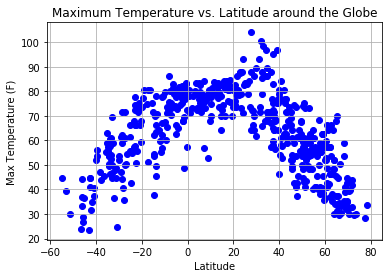

In [16]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. Latitude around the Globe")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTempvsLatitude.png")

# Show plot
plt.show()

#### Humidity versus latitude plot

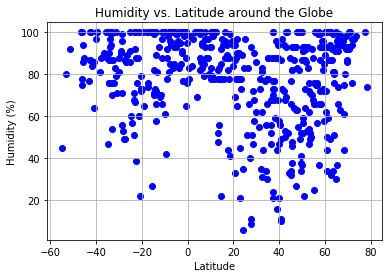

In [17]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude around the Globe")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLatitude.png")

# Show plot
plt.show()

#### Cloudiness versus latitude plot

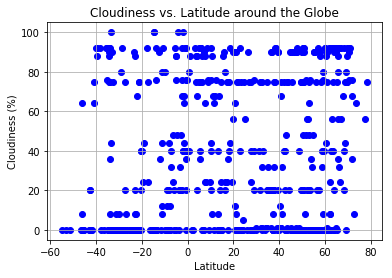

In [18]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude around the Globe")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvsLatitude.png")

# Show plot
plt.show()

#### Wind speed versus latitude plot

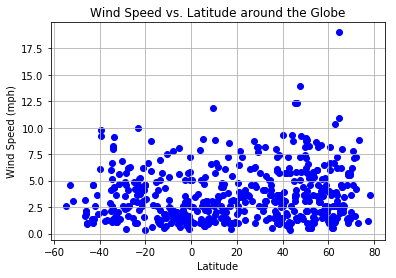

In [19]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude around the Globe")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpdsLatitude.png")

# Show plot
plt.show()

#### Three Conclusions

##### 1. Clearly, temperature goes up as you get closer to the equator. The temperature data bends in an arc, from 30 degrees Fahrenheit at -60 degrees latitude to 85 degrees at the equator to 30 degrees at 80 degrees latitude.

###### 2. Wind Speed and Humidity appear normally distributed, with a low wind speed and a high humidity being the consistent realities for this data set. The global humidity seems to have a median of around 85%, and wind speed seems to be a median of around 1.5-2.5%.

##### 3. Simply looking at cloudiness versus latitude does not tell us much more than that it appears random: cloudiness may have a relationship with other data (like if it is a coastal or non-coastal city, etc.) but there does not seem to be a relationship with latitude.

In [23]:
ipython nbconvert --to markdown Python APIs README.ipynb

SyntaxError: invalid syntax (<ipython-input-23-9c7eac7d5a0d>, line 1)